## 붓꽃 데이터 품종 예측

### 데이터 불러오기 및 살펴보기

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [9]:
import pandas as pd

# TODO: 붓꽃 데이터 세트 로드

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
# iris.data: 피처 
iris_data = iris.data
# iris.target: 레이블 혹은 타겟 - 품종
iris_label = iris.target

print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


In [14]:
# 붓꽃 데이터  DataFrame으로 변환
iris_df = pd.DataFrame( iris_data, columns=iris.feature_names )
iris_df['label'] = iris.target
iris_df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
67,5.8,2.7,4.1,1.0,1
106,4.9,2.5,4.5,1.7,2
101,5.8,2.7,5.1,1.9,2
40,5.0,3.5,1.3,0.3,0
11,4.8,3.4,1.6,0.2,0


In [17]:
# 살펴보기
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [18]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# 데이터 레이블의 불균형이 없는지 확인
iris_df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

속성 중요도 판단을 위한 시각화해보기

In [16]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

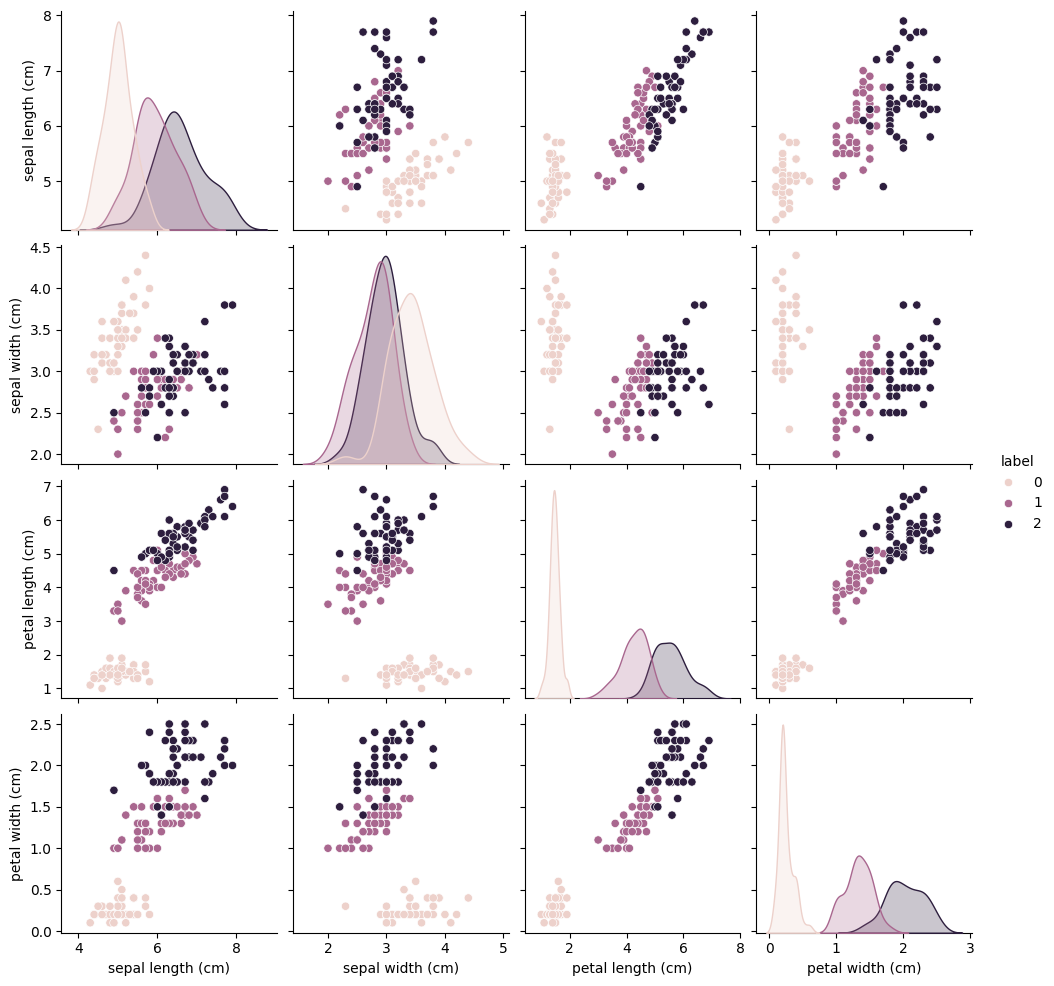

In [24]:
sns.pairplot(iris_df, diag_kind='kde', hue='label')

<Axes: >

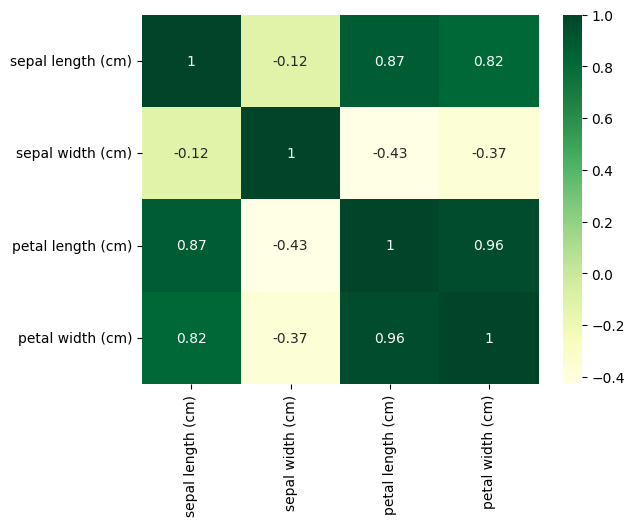

In [ ]:
sns.heatmap(iris_df.drop(columns='label', axis=1).corr(), annot=True, cmap='YlGn')

### Decision Tree

In [29]:
# 속성과 Target 분리
X = iris_df.drop(columns='label', axis=1)
y = iris_df['label']

In [37]:
# 학습용 데이터와 테스트용 데이터로 분리
# 테스트 20%, 학습 80% , random_state=10
# 분류에서는 클래스별 비율이 중요하기 때문에 클래스별로 샘플링하기 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=10)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [38]:
y_train.value_counts()

label
0    36
2    36
1    33
Name: count, dtype: int64

In [ ]:
# 분류에서는 클래스별 비율이 중요하기 때문에 클래스별로 샘플링하기 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=10, stratify = y)

y_train.value_counts()

label
0    35
1    35
2    35
Name: count, dtype: int64

In [87]:
# DecisionTree로 학습
# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=42) # 동일한 기준이 여러 개일때 랜덤으로 선택

# 학습 (학습 데이터를 사용하여 fit)
dt_clf.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [88]:
#  예측
pred = dt_clf.predict(X_test)

In [89]:
print("예측 label: ", pred)
print("실제 label: ", y_test.values)

예측 label:  [1 0 1 2 2 2 0 2 2 0 0 1 2 2 1 0 0 1 2 0 2 2 2 0 0 1 1 0 1 1]
실제 label:  [1 0 1 2 1 2 0 2 2 0 0 1 2 2 1 0 0 1 2 0 2 2 2 0 0 1 1 0 1 1]


#### 성능 평가하기

In [90]:
# 성능 평가하기
# 정확도는 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지를 평가하는 지표

from sklearn.metrics import accuracy_score

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9667


In [117]:
print('의사결정나무')
print("훈련 정확도:", dt_clf.score(X_train, y_train))
print("테스트 정확도:", dt_clf.score(X_test, y_test))

의사결정나무
훈련 정확도: 1.0
테스트 정확도: 0.9666666666666667


In [91]:
# 분류 모델 평가 지표들 리포트
from sklearn.metrics import classification_report
print('Decision Tree Classifier Report')
print(classification_report(y_test, pred))

## macro avg : 클래스별 데이터 개수 고려하지 않고 동일한 비중으로 구한 평균
## weighted avg : 클래스별로 데이터 개수를 고려해서 각각 다른 비중으로 구한 평균
## support : 각 클래스의 데이터 개수

Decision Tree Classifier Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
# confusion matrix 확인해보기
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred, labels= [0,1,2])
cm
# 다중 클래스의 혼동 행렬

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 15]])

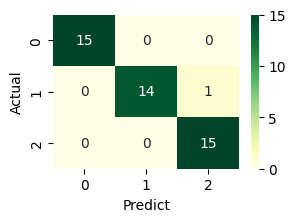

In [75]:
# confusion 매트릭스 시각화해보기
plt.figure(figsize=(3,2))
sns.heatmap(cm, annot=True, cmap='YlGn')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show() # 이걸 해야 딱 플롯만 보여줌

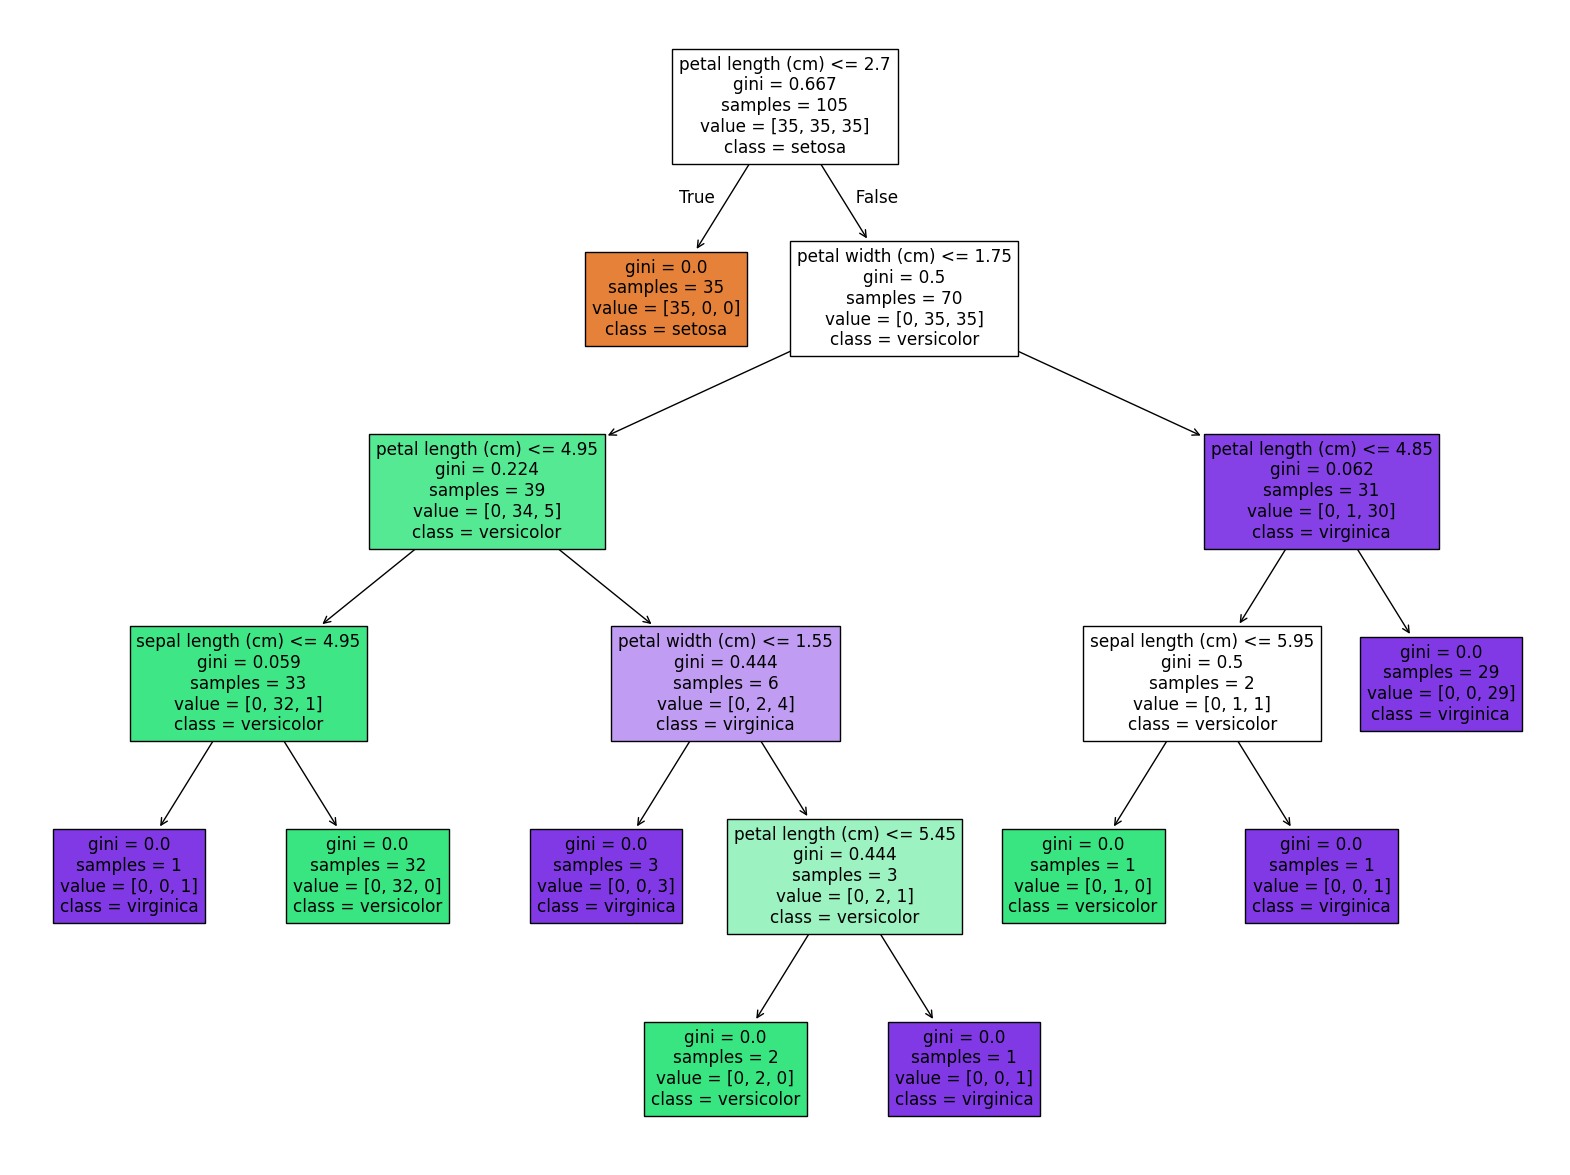

In [62]:
# 트리 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree( dt_clf, 
          feature_names=iris.feature_names, class_names=iris.target_names,
          filled=True)
plt.show()

In [ ]:
# 트리 깊이 확인하기
dt_clf.get_depth()

5

In [ ]:
# 각 feature 중요도 확인
print(dt_clf.feature_importances_)
# petal 쪽에 중요도가 몰려 있음 

[0.04199134 0.         0.59115293 0.36685572]


<Axes: >

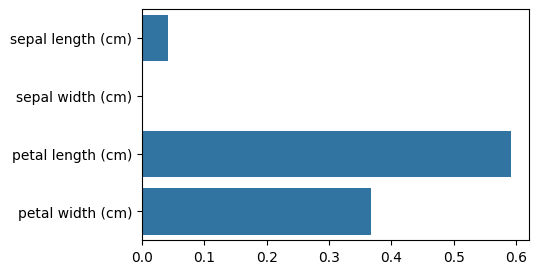

In [67]:
# feature 중요도 시각화
plt.figure(figsize=(5,3))
sns.barplot(y= iris.feature_names, x=dt_clf.feature_importances_)

## 교차 검증(Cross Validation)

In [93]:
from sklearn.datasets import load_iris 
iris = load_iris() 
df_iris = pd.DataFrame(iris.data,
             columns = iris.feature_names)
df_iris["label"] = iris.target
df_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [94]:
X = df_iris.drop('label', axis=1)
y = df_iris['label']

In [95]:
from sklearn.model_selection import train_test_split

# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [105]:
# 훈련데이터로 교차검증 

# 교차 검증 라이브러리 
from sklearn.model_selection import StratifiedKFold
# 의사결정나무 분류 모델 라이브러리
from sklearn.tree import DecisionTreeClassifier
# 교차 검증 평가 라이브러리
from sklearn.model_selection import cross_val_score

# 교차 검증 객체 생성 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10) 
model = DecisionTreeClassifier()

# 교차 검증하면서 정확도 측정해보기
# cross_val_score 지표들의 리스트 반환
## 정확도 (클래스 간 비율이 불균형하면 정확도가 맞지 않을 수도 있음 )
cv_scores_accuracy = cross_val_score(model, X = X_train, y = y_train, scoring='accuracy', cv=skf)
## f1 score
cv_scores_f1= cross_val_score(model, X = X_train, y = y_train, scoring='f1_macro', cv=skf)
# 데이터 많은 경우에는 cross_validate를 돌린다 (더 효율적)


print('accuracy : ', cv_scores_accuracy, cv_scores_accuracy.mean())
print('f1 : ', cv_scores_f1, cv_scores_f1.mean())

accuracy :  [0.875      0.95833333 0.875      0.875      0.95833333] 0.9083333333333334
f1 :  [0.91534392 0.95816993 0.87044534 0.8745098  0.95816993] 0.915327786535217


In [106]:
# 학습 
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [107]:
# 최종평가 
from sklearn.metrics import classification_report

### GridSearchCV

In [108]:
# GridSearchCV # 모델 튜닝 

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# 교차 검증 객체 생성
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

# 하이퍼 파라미터 지정
parameters = {'max_depth':[3,4,5],     # 의사결정나무 깊이
              'min_samples_split':[2,4]}    # 분할할 수 있는 최소 샘플 개수

# 그리드 서치 객체 생성
gscv = GridSearchCV(model, param_grid=parameters, cv=skf, refit=True)

# 그리드 서치로 학습 
gscv.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [3, 4, ...], 'min_samples_split': [2, 4]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedKFo... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is

In [112]:
# 그리드 서치로 찾은 파라미터 
gscv.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [110]:
# best_estimator에 그리드서치로 찾은 하이퍼파라미터가 저장됨 
best_model = gscv.best_estimator_
pred_grid = best_model.predict(X_test)

In [111]:
# GridSearchCV 결과확인 
from sklearn.metrics import classification_report
print('Decision Tree Classifier - Grid Search result')
print(classification_report(y_test, pred_grid))

Decision Tree Classifier - Grid Search result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



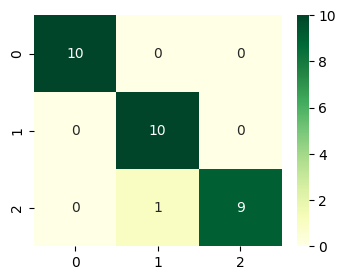

In [104]:
cm_grid = confusion_matrix(y_test, pred_grid, labels=[0,1,2])
plt.figure(figsize=(4,3))
sns.heatmap( cm_grid, annot=True, cmap='YlGn')
plt.show()

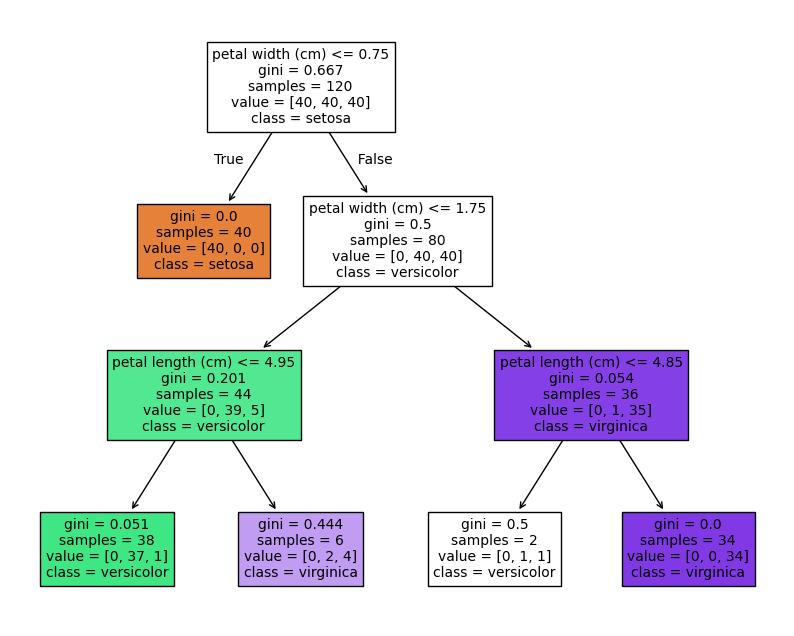

In [114]:
plt.figure(figsize=(10,8))
plot_tree( best_model,
          feature_names=iris.feature_names, class_names=iris.target_names,
          filled=True)
plt.show()

In [119]:
print('의사결정나무 + 하이퍼파라미터 튜닝')
print("훈련 정확도:", best_model.score(X_train, y_train))
print("테스트 정확도:", best_model.score(X_test, y_test))

의사결정나무 + 하이퍼파라미터 튜닝
훈련 정확도: 0.9666666666666667
테스트 정확도: 0.9666666666666667


In [ ]:
# 최종 테스트